In [1]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
sys.path.append("../")
import data_helpers

In [2]:
df = data_helpers.import_data(sio.loadmat("../tire_data/processed_data/braking_2021_rears.mat"))

print(df)

variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

             ET      V       N     SA     IA      RL      RE      P       FX  \
0         5.080  40.28  546.97 -0.067 -0.039  21.871  19.539  83.08  2659.12   
1         5.090  40.29  546.35 -0.066 -0.031  21.875  19.566  83.23  2713.15   
2         5.100  40.29  545.87 -0.072 -0.037  21.874  19.583  83.18  2782.99   
3         5.110  40.28  545.46 -0.051 -0.014  21.856  19.593  83.08  2853.60   
4         5.120  40.26  545.12 -0.083 -0.031  21.858  19.596  82.83  2912.92   
...         ...    ...     ...    ...    ...     ...     ...    ...      ...   
76200  1628.963  40.42  524.95 -6.067  3.952  22.791  20.313  97.15   438.70   
76201  1628.973  40.42  524.95 -6.062  3.955  22.790  20.313  96.84   424.74   
76202  1628.983  40.43  525.29 -6.067  3.955  22.784  20.304  96.69   398.76   
76203  1628.993  40.42  525.29 -6.062  3.953  22.791  20.300  96.69   367.00   
76204  1629.003  40.41  525.43 -6.061  3.956  22.786  20.292  96.94   337.11   

           FY  ...   TSTO  AMBTMP     S

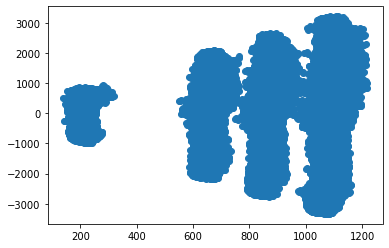

In [3]:
plt.scatter(-df["FZ"], df["FX"])

### Finding Maximum Long Friction Coefficient

In [13]:
x = df[df["load"] == -50/0.224809]
z = x[x["slip"] == 0]
for val in z["pressure"].unique():
    temp = z[z["pressure"] == val]
    y = temp.loc[temp["FX"].idxmax()]
    print(y["FX"]/y["FZ"]*2/3, val)

-2.6411785554682323 82.73712
-2.180381019997634 68.9476
-2.6312077578607114 96.52664
